# Objectives

1. Understand the data and clean it as necessary.
2. Perform exploratory data analysis (EDA) to identify the driving factors behind loan default.
3. Visualize the significant variables that indicate default.

In [1]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading loan.csv as a Pandas Datafrae
df = pd.read_csv('loan.csv',low_memory=False)

In [3]:
# Looking at first few records, to make sure the data is loaded
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Data Exploration

In [4]:
# Looking at the summary Statistics
pd.set_option('display.max_columns', None)
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Total records 39,717 records.
For most of the variables. Here are some key insights:

1. Loan Amount ('loan_amnt'):
   On average, loans of about 11,219 dolars were issued.
   These loans range from a minimum of 500 dollars to a maximum which is not specified in the summary.
   Half of the loans were for 10,000 dollars or less, and 75% were for 15,000 dollars or less.

2. Annual Income ('annual_inc'):
   The average annual income of borrowers is roughly 68,968.93 dollars.
   The incomes vary widely, with the lowest being 4,000 dollars and the upper quartile being 82,300 dollars.

3. Debt-to-Income Ratio ('dti'):
   On average, the debt-to-income ratio is 13.32.
   It has a wide spread, ranging from a low of 0 to a high that isn’t specified in the summary.

4. Accounts Opened ('open_acc'):
   Borrowers have an average of about 9.29 open accounts.
   Most borrowers have between 6 and 12 open accounts.

5. Public Records ('pub_rec'):
   On average, borrowers have 0.055 public records, suggesting that most of the borrowers have no public records.

6. Revolving Balance ('revol_bal'):
   The average revolving balance is 13,382.53 dollars.
   Half of the borrowers have a revolving balance of $8,850 or less.

7. Total Payment ('total_pymnt'):
   The average total payment made is 12,153.60 dollars.
   Half of the borrowers have made payments amounting to 9,899.64 dollars or less.

It's evident that many columns have a lot of missing values, especially columns related to joint income and details of credit lines opened in the last 6 to 24 months. Columns like 'annual_inc_joint', 'dti_joint', and 'verification_status_joint' have no data provided in the summary.

Also, certain columns, like 'policy_code', seem to have a constant value (1 in this case). These columns may not provide any variability or meaningful information.

This is just a cursory overview based on the summary statistics provided. A deeper analysis would involve looking at relationships between variables, identifying potential outliers, and perhaps even building predictive models.

In [5]:
# Verifying all the null values in the data by understanding the percentage of null in all the columns
nulls = round(100*(df.isnull().sum()/len(df.index)), 2)
pd.set_option('display.max_rows',None)
nulls.sort_values(ascending=False)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [6]:
# There are columns that have complete nulls we'll get rid of those columns
df.drop(nulls[ nulls > 32.50 ].index, axis=1, inplace=True)

In [7]:
df.describe(include=object)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,39706,39717,39717,39717,39667,39717,39646,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,1,39717,14,19615,823,50,526,1089,1,101,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,39717,1,18641,2184,597,7099,370,977,39717,1256,10308,39717


Below are some more insights after cleaning the data

1. Term: There are two unique loan terms in the dataset. The majority (29096 out of 39717) of the loans are for a duration of "36 months."

2. Interest Rate (int_rate): There are 371 unique interest rates, with the most common rate being "10.99%", which appears 956 times. It's worth investigating if this rate corresponds to a specific loan grade or borrower profile.

3. Grade & Sub-grade: Loans are classified into 7 unique grades and 35 unique sub-grades. Grade 'B' is the most prevalent, especially the sub-grade 'B3'. This might suggest a majority of the borrowers fall into a middle-tier creditworthiness.

4. Employment Title (emp_title): There's a wide variety of employment titles with 28820 unique titles. Surprisingly, the most frequent title is "US Army." This provides a glimpse into the diversity of borrowers and their professions.

5. Employment Length (emp_length): Most borrowers (8879 out of 38642) have an employment length of "10+ years," indicating a significant portion of borrowers have stable, long-term employment.

6. Home Ownership: The majority of borrowers (18899 out of 39717) rent their homes. This might be indicative of the demographic of borrowers on the platform.

7. Verification Status: The most common verification status is "Not Verified" (16921 occurrences). It might be worthwhile to investigate if the loan default rates are higher for non-verified loans.

8. Issue Date (issue_d): The month with the highest number of loans issued is "Dec-11". There could be seasonal factors or promotional reasons for this spike.

9. Loan Status: A significant majority (32950 out of 39717) of the loans are "Fully Paid", which is a positive indicator of the platform's loan performance.

10. Purpose & Title: The primary purpose for most loans is "debt consolidation" (18641 occurrences), with the title "Debt Consolidation" also being the most frequent (2184 occurrences). This suggests that many borrowers are using the platform to consolidate their existing debts.

11. Address State (addr_state): California (CA) has the highest number of borrowers, with 7099 occurrences. This could be due to a larger population or more aggressive marketing in that state.

12. Earliest Credit Line (earliest_cr_line): The most frequent earliest credit line date is "Nov-98". This could be indicative of the age group or financial maturity of the borrowers.

13. Revolving Utility (revol_util): There are 1089 unique values, but it's interesting to note that a utility of "0%" is most frequent. This suggests that a segment of borrowers does not utilize their revolving credit or they might have recently paid off their credit lines.

14. Last Payment Date (last_pymnt_d) & Last Credit Pull Date (last_credit_pull_d): The most common last payment date and last credit pull date are both "May-16", implying recent activity for a substantial number of loans.

15. Application Type: All loans in this dataset are applied by individuals (INDIVIDUAL) rather than joint applications.

In [8]:
# Displyaing the datatypes of all the columns to see if there is any manupulation need
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

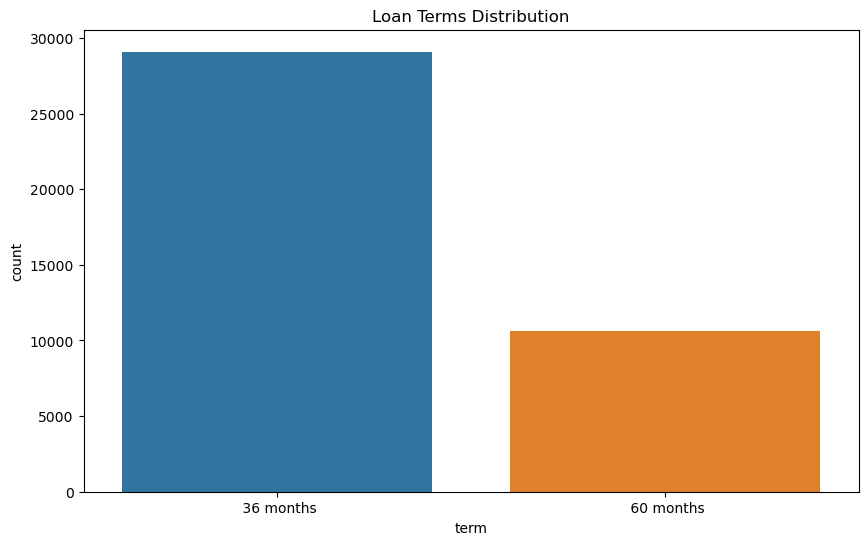

In [9]:
# 1. Term:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='term')
plt.title('Loan Terms Distribution')
plt.show()

Conclusion from the chart:
The chart shows a clear preference among borrowers for loans with a term of 36 months. These 36-month loans are significantly more popular than the 60-month loans, with counts almost three times higher.

Impact on business:
1. The preference for 36-month loans suggests that borrowers are more comfortable committing to shorter repayment periods, possibly due to uncertainty about long-term financial stability.
2. Financial institutions might see quicker returns on 36-month loans due to their shorter duration, which can improve cash flow.
3. There could be higher demand for resources and processes catering to 36-month loans, necessitating efficient processing and management systems for this category.
4. The lesser popularity of 60-month loans may indicate a potential market gap. Financial institutions could explore incentivizing longer-term loans or revisiting the terms to make them more attractive.
5. Understanding borrower behavior can aid in predictive analytics, risk assessment, and tailoring financial products to meet market demands.

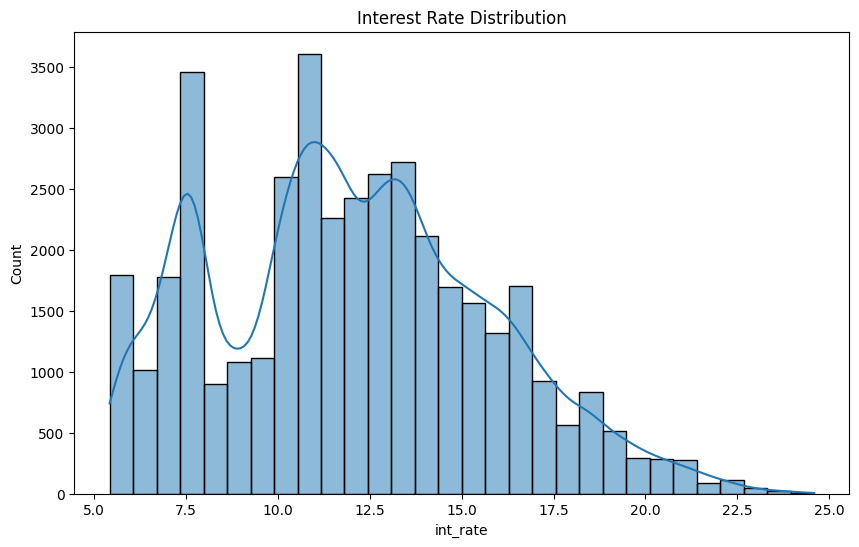

In [29]:
# 2. Interest Rate:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='int_rate', bins=30, kde=True)
plt.title('Interest Rate Distribution')
plt.show()

Conclusion from the chart:
The chart displays the distribution of interest rates for loans. It reveals multiple peaks, most notably around 7.5%, 12.5%, and just under 15%. The majority of loans have interest rates that fall between 5% and 20%, with fewer loans assigned rates above 20%.

Impact on business:
1. The prominent peaks indicate that certain interest rates (like 7.5%, 12.5%, and around 15%) are more commonly assigned, possibly due to standardized loan products or specific risk tiers.
2. The decrease in loan counts for interest rates above 20% suggests that fewer borrowers are categorized in higher-risk tiers, or the business might be cautious about offering high-interest loans.
3. High interest rates might deter some potential borrowers. Offering competitive rates, especially in the most common bands, could attract more customers.
4. Understanding this distribution can help the financial institution assess its risk appetite. If there's an inclination to expand the business, they might consider offering more loans in the less-saturated higher interest bands, considering the associated risks.
5. The institution might need to analyze the default rates associated with each interest rate band. High concentrations of loans in specific interest rate bands might present clustered risks if associated default rates are high.

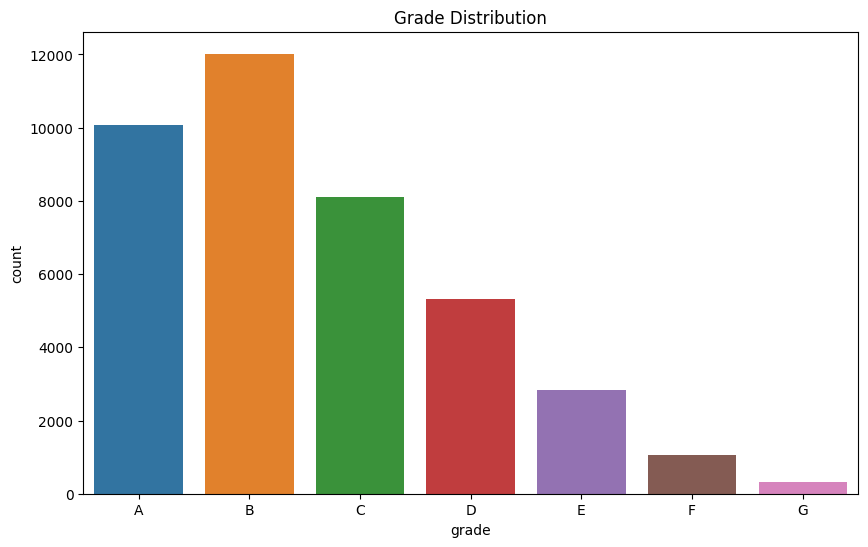

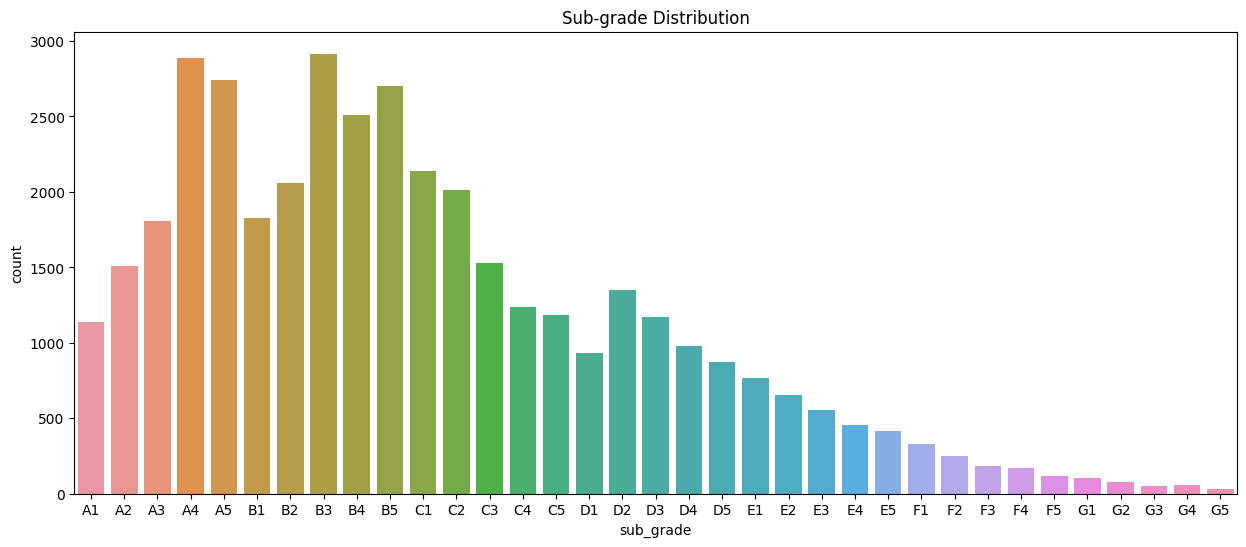

In [31]:
# 3. Grade & Sub-grade:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', order=sorted(df['grade'].unique()))
plt.title('Grade Distribution')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='sub_grade', order=sorted(df['sub_grade'].unique()))
plt.title('Sub-grade Distribution')
plt.show()

Conclusion from the chart:
1. Grade Distribution: The first chart illustrates the distribution of loan grades from A to G. The majority of loans are concentrated in grades A, B, and C, indicating that most loans are offered to borrowers considered to have low to moderate risk. The number of loans decreases as the grade worsens, with the fewest loans in grade G.
2. Sub-grade Distribution: The second chart breaks down each grade into its sub-grades (for example, A1 to A5). This distribution appears to be more uniform within each primary grade, with slight variations. For instance, sub-grades like B4, C1, and A5 seem to have a slightly higher count than their neighboring sub-grades.

Impact on business:
1. Risk Management: The higher concentration of loans in grades A-C suggests that the business prefers to lend to borrowers with better creditworthiness, thereby managing and minimizing risk.
2. Market Positioning: The distribution might indicate the institution's market positioning - possibly targeting middle-tier borrowers rather than high-risk or very low-risk segments.
3. Opportunity for Diversification: While focusing on low to moderate risk borrowers can be safe, there may be potential revenue opportunities in the higher-risk grades (D-G) provided the business can manage and price for the associated risks.
4. Pricing Strategy: Interest rates and fees can be adjusted based on these grades. Since the distribution leans towards A-C grades, competitive pricing in these bands could attract more customers while potentially higher rates or fees in D-G grades could compensate for the higher associated risk.
5. Sub-grade Insights: By analyzing sub-grade distributions, the business can refine its loan products and offers. For example, if B4 or C1 sub-grades show better repayment behaviors than B3 or C2, slight adjustments in loan terms or rates could be made.
6. Customer Outreach: Knowing the majority of their borrowers fall into A-C grades, marketing and outreach campaigns can be tailored to appeal to this demographic, ensuring better engagement and potential retention.

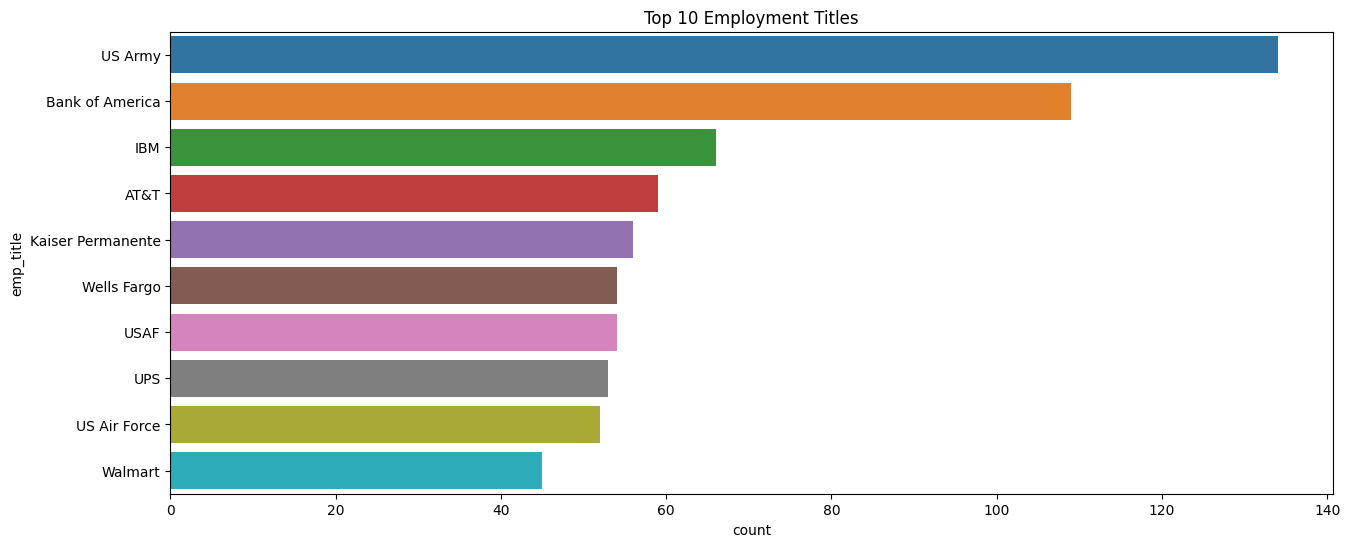

In [32]:
# 4. Employment Title:
plt.figure(figsize=(15, 6))
top_titles = df['emp_title'].value_counts().nlargest(10).index
sns.countplot(data=df, y='emp_title', order=top_titles)
plt.title('Top 10 Employment Titles')
plt.show()

Conclusion from the chart:
1. Diverse Employers: The chart showcases a variety of employers ranging from military institutions (US Army, USAF, US Air Force) to banks (Bank of America, Wells Fargo) to technology and service companies (IBM, AT&T, UPS) and a healthcare provider (Kaiser Permanente) and a retail giant (Walmart).
2. Military Representation: The US Army has the highest representation among the given employment titles. It's also notable that three out of the top ten are military or military-related titles (US Army, USAF, US Air Force).
3. Corporate Representation: Large corporate entities like Bank of America, IBM, AT&T, and Wells Fargo also have significant representation, suggesting that employees from these organizations are perhaps active in whatever context this data is presented (e.g., loan applications, membership enrollments, etc.).
4. Spread: While the US Army has a notably higher count, the rest of the entities have a more evenly distributed representation, with only slight variations in their counts.

Impact on business:
1. Targeted Marketing: If this data pertains to a financial institution or service provider, understanding where the bulk of their clients or customers work can allow for more targeted marketing or partnership opportunities. For instance, they could consider special offers or promotions for military personnel given the high representation from the army.
2. Partnership Opportunities: Knowing that a significant portion of their clients or users are from certain corporations, businesses can seek partnership or collaborative ventures with these entities.
3. Risk Management: If this is related to financial transactions, understanding employment distribution can aid in risk assessment. Employees from stable institutions might be considered lower risk.
4. Feedback and Product Development: Interacting with a diverse set of employees from different sectors can provide varied feedback, allowing the business to tailor its products or services to cater to a broader audience.
5. Understanding Economic Impact: If there are any significant economic changes in any of these sectors (e.g., layoffs in the tech industry or defense budget cuts), the business might anticipate potential impacts on their operations and plan accordingly.
6. Employee Benefits and Services: If this is a service platform or a membership platform, understanding the major employers can help in tailoring employee benefits or corporate packages that cater specifically to the needs of these large groups.

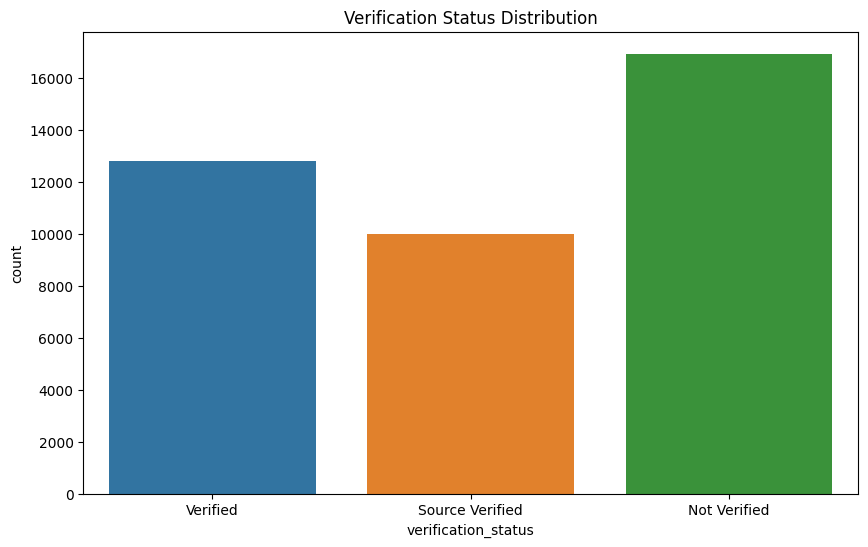

In [35]:
# 5. Verification Status:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='verification_status')
plt.title('Verification Status Distribution')
plt.show()

Conclusion from the chart:
1. Different Levels of Verification: The chart categorizes data into three distinct verification statuses: "Verified", "Source Verified", and "Not Verified".
2. Mostly Not Verified: A significant proportion of the data points or entities fall under the "Not Verified" status, making it the category with the highest count.
3. Verified vs. Source Verified: The number of "Verified" entities is slightly more than that of "Source Verified". However, both categories have a significant representation.
4. Reliability Concern: While there are many verified and source-verified entities, the sheer number of unverified entities can be a cause for concern depending on the context of this data.

Impact on business:
1. Trust and Credibility: Having a large number of "Not Verified" entities could diminish trust and credibility in whatever service or platform is being represented by this data. This could deter potential users or clients who prioritize verified information.
2. Operational Priorities: The business might need to invest more in verification processes to reduce the number of "Not Verified" entities, ensuring more accuracy and trustworthiness.
3. Decision Making: For businesses that rely on this data for decision-making (e.g., loan approvals, membership validations), a high count of unverified entities might pose a risk. They might have to be more cautious or set stricter guidelines for unverified entries.
4. Potential for Automation: The difference between "Verified" and "Source Verified" might suggest different levels or methods of verification. If "Source Verified" means that it was verified by an automated system or third-party, there might be an opportunity to increase automation and reduce manual verifications, speeding up the process.
5. User Outreach: The business might consider reaching out to those in the "Not Verified" category to encourage them to complete the verification process, thereby increasing the trustworthiness of the overall database or platform.
6. Feedback Loop: Understanding why so many entities remain unverified can provide insights. It could be due to cumbersome verification processes, lack of user interest, or some other barriers. Addressing these issues can improve the overall verification rate.

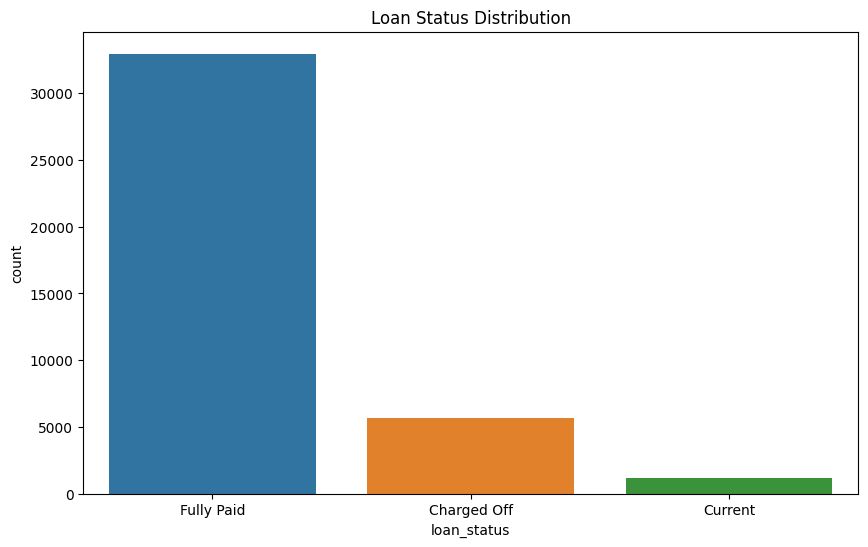

In [37]:
# 6. Loan Status:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.show()

Conclusion from the chart:
1. The majority of loans have been "Fully Paid".
2. A smaller portion of loans are labeled as "Charged Off", indicating loans that were declared uncollectible.
3. An even smaller segment represents "Current" loans, implying ongoing payments.
4. There's a significant gap between the number of "Fully Paid" loans and the other two categories.
5. The number of "Charged Off" loans exceeds the "Current" loans, suggesting a higher default rate compared to ongoing loans.

Impact on business:
1. A high number of "Fully Paid" loans reflects positively on the business's lending practices and customer trustworthiness.
2. The "Charged Off" loans indicate potential losses and might necessitate a review of lending criteria.
3. Fewer "Current" loans might indicate a slowdown in new loan issuances or faster repayment rates.
4. The difference between "Charged Off" and "Current" loans might necessitate enhanced monitoring and intervention strategies for ongoing loans.
5. Ensuring the ratio of "Fully Paid" loans remains high in the future will be critical for maintaining trust and the financial health of the business.

# Bivariate analysis

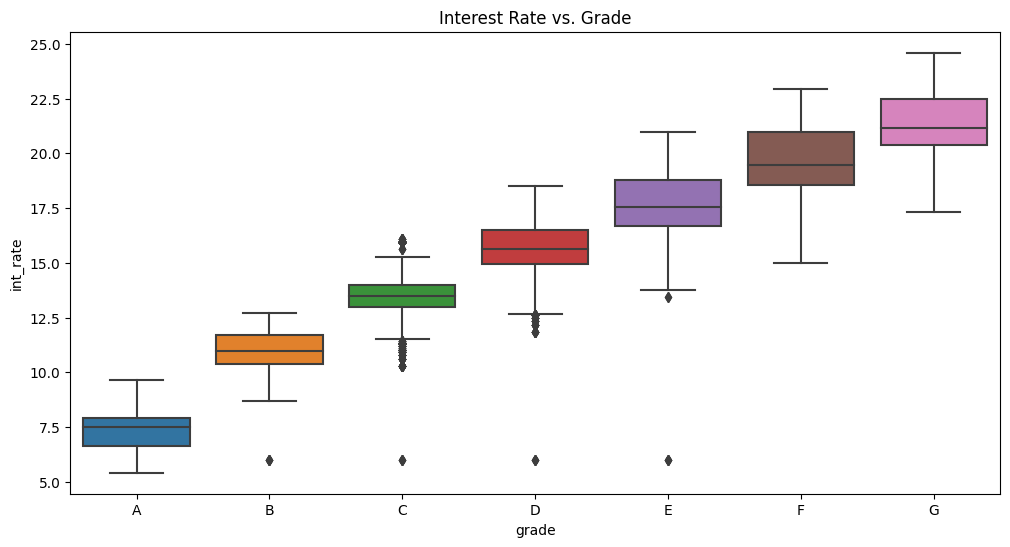

In [45]:
# 1. Interest Rate vs. Grade
plt.figure(figsize=(12, 6))
sns.boxplot(x="grade", y="int_rate", data=df, order=sorted(df['grade'].unique()))
plt.title('Interest Rate vs. Grade')
plt.show()

Conclusion from the chart:
1. The chart showcases a clear trend: as the grade moves from A to G, the median interest rate generally increases.
2. Grade A loans have the lowest interest rates, indicating they are perceived as the least risky.
3. Grade G loans have the highest interest rates, suggesting they are viewed as the most risky.
4. There are a few outliers, especially in the grades C and D, where some interest rates deviate significantly from the main distribution.
5. The spread of interest rates is wider for some grades like C, D, and E compared to others, suggesting varying levels of uncertainty or variability in these categories.

Impact on business:
1. Charging higher interest rates for riskier grades compensates the business for the added risk of potential defaults.
2. The variability in interest rates for grades C, D, and E might require further analysis to understand the underlying factors or criteria determining these rates.
3. Outliers, especially in grades C and D, could represent special cases or exceptions in the lending process and may need to be reviewed.
4. Offering a range of interest rates across grades allows the business to cater to a broader customer base with varying credit profiles.
5. Regularly reviewing and adjusting this grading system can help the business fine-tune its risk assessment and lending practices, ensuring profitability and customer satisfaction.

<Figure size 1200x600 with 0 Axes>

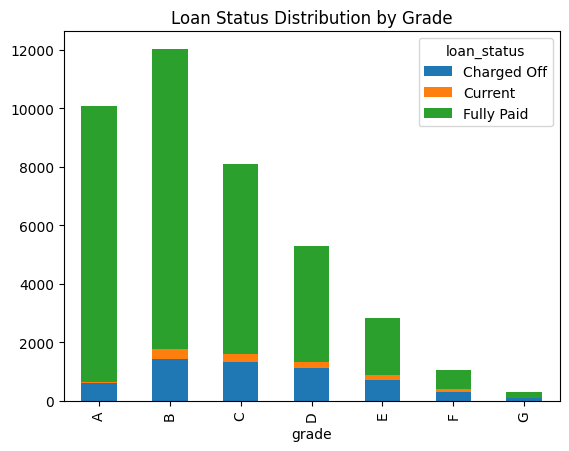

In [46]:
# 2. Loan Status vs. Grade
plt.figure(figsize=(12, 6))
df.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Loan Status Distribution by Grade')
plt.show()

Conclusion from the chart:
1. The number of loans decreases as the grade moves from A to G, indicating that fewer high-risk loans are issued.
2. For all grades, the majority of the loans have been fully paid, with the green bars dominating the chart.
3. The number of charged-off loans (defaulted loans) seems to be relatively consistent across most grades, but in absolute numbers, it is low.
4. The number of current loans (those still being paid off) is also relatively consistent across grades but becomes notably less frequent in grades F and G.
5. Grades A and B have the highest number of fully paid loans, suggesting a more reliable repayment pattern for those grades.

Impact on business:
1. The majority of loans being fully paid indicates a healthy repayment pattern, which is good for the business's profitability and sustainability.
2. While the number of charged-off loans is consistent across grades, their impact might be more pronounced in grades with higher interest rates due to potential lost revenue.
3. The lower number of loans in grades F and G suggests that the business might be more cautious when lending to high-risk customers or that there's less demand in those grades.
4. Grades A and B showing high repayment rates might encourage the business to market more towards the demographic that fits into these grades, ensuring consistent revenue.
5. Regularly monitoring loan statuses across grades can guide the business in adjusting lending practices and risk management strategies to minimize defaults and maintain a healthy loan portfolio.

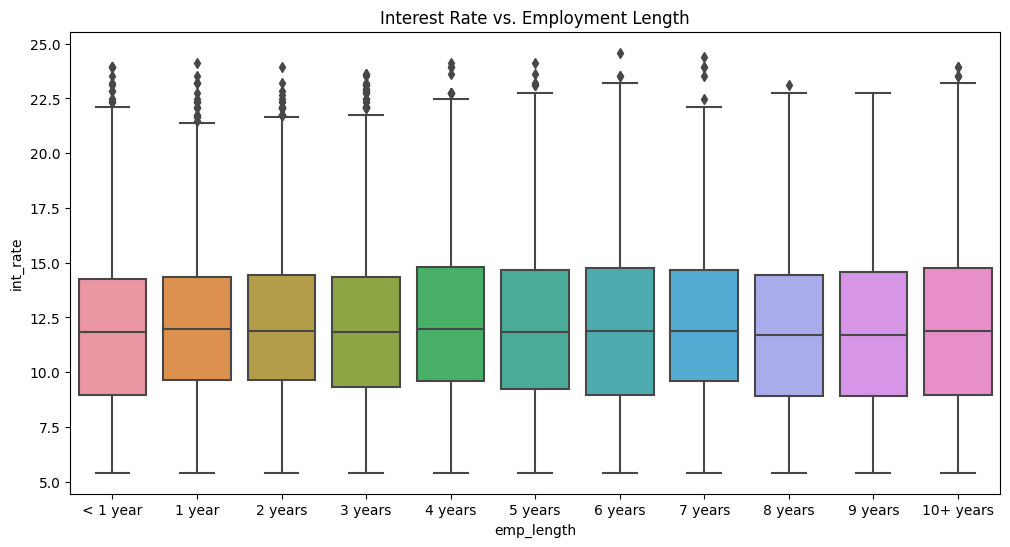

In [47]:
# 3. Employment Length vs. Interest Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x="emp_length", y="int_rate", data=df, order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
plt.title('Interest Rate vs. Employment Length')
plt.show()

Conclusion from the chart:
1. Interest rates for borrowers across different employment lengths are fairly consistent, with median rates hovering around the 15% mark.
2. Borrowers with less than 1 year of employment tend to have a slightly higher spread of interest rates, as indicated by the taller whiskers.
3. There doesn't appear to be a direct linear correlation between employment length and the median interest rate assigned.
4. Outliers (indicated by diamond shapes) are present in almost all employment lengths, suggesting that factors other than just employment length influence the rate.
5. The quartile range (height of the boxes) appears relatively consistent across all employment lengths, indicating a similar distribution of interest rates within each group.

Impact on business:
1. Since interest rates are consistent across employment lengths, it suggests that employment length isn't a primary factor determining interest rates.
2. The presence of outliers across all employment lengths might indicate external factors affecting interest rates, which businesses should consider when determining loan terms.
3. The business's risk perception doesn't dramatically change with employment length, as inferred from the consistent quartile ranges.
4. Borrowers with less than 1 year of employment showing a wider spread of rates might indicate a potential area for review; considering if that spread is due to a lack of data or other risk factors.
5. Regularly assessing the factors influencing these rates can help in refining lending models, ensuring competitive and fair loan offerings while maintaining profitability.The "Interest Rate vs. Employment Length" chart presents the relationship between employment duration and interest rates. Surprisingly, a clear linear correlation between employment length and interest rate isn't evident. The box plots, representing interest rate distribution for each employment period, show relatively consistent median rates across categories. For instance, both the "<1 year" and "10+ years" segments have comparable median rates. The spread of rates within each category, demonstrated by the box and whisker lengths, is also notably uniform across the board. In essence, while one might anticipate longer employment to correlate with particular interest rates, the data suggests a more multifaceted relationship. Lenders appear to weigh other factors alongside employment duration when determining interest rates.

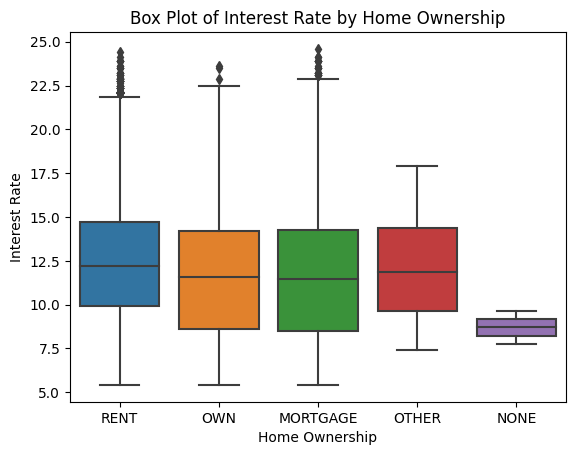

In [52]:
#4. Home Ownership and Interest Rate
sns.boxplot(x=df['home_ownership'], y=df['int_rate'])
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate')
plt.title('Box Plot of Interest Rate by Home Ownership')
plt.show()

Conclusion from the chart:
1. Borrowers with the "NONE" category for home ownership are offered significantly lower interest rates than any other group.
2. The median interest rates for those who rent, own, or have a mortgage are relatively similar, hovering around the 15% range.
3. Each of these three groups (RENT, OWN, MORTGAGE) also has a spread of interest rates, as indicated by the height of the boxes and the whiskers, with several outliers especially for the "RENT" category.
4. The "OTHER" category of home ownership has a narrower spread, suggesting that there's less variability in the interest rates provided to this group.
5. Outliers are present mostly in the "RENT" and "MORTGAGE" categories, indicating exceptions to the general interest rate trends for these groups.

Impact on business:
1. The significantly lower rates for the "NONE" category might indicate a niche or specialty lending product, which could cater to a specific borrower demographic.
2. The broad spread of rates, especially in the "RENT" category, may represent an opportunity for businesses to refine their lending criteria or reevaluate risk factors.
3. Consistent median rates for the "RENT", "OWN", and "MORTGAGE" groups suggest that home ownership status in these categories might not be a primary determinant of interest rates.
4. Outliers, particularly in the "RENT" category, could indicate either higher risk borrowers or unique lending scenarios that might require special attention.
5. Understanding the reasons behind the tighter spread in the "OTHER" category could provide insights into the characteristics or behaviors of this group, potentially leading to tailored loan products.

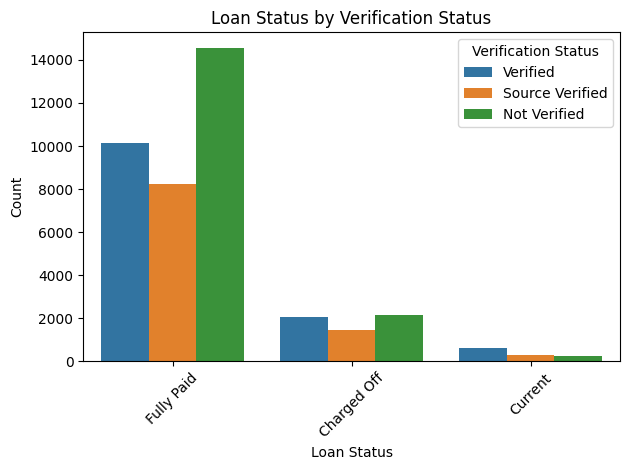

In [49]:
# 5. Plot using countplot to visualize distribution of loan statuses for each verification status
sns.countplot(x=df['loan_status'], hue=df['verification_status'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status by Verification Status')
plt.legend(title='Verification Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion from the chart:
1. A majority of loans that are "Fully Paid" were from applicants whose details were "Verified".
2. For the "Charged Off" category, the majority are also from "Verified" borrowers, but there's a significant portion from the "Source Verified" group as well.
3. The "Current" loans have a low count across all verification statuses, with "Not Verified" being the least.
4. Loans that are "Not Verified" have the lowest counts across all loan statuses, indicating that perhaps fewer loans are issued to unverified applicants.
5. The "Source Verified" category tends to lie in the middle for both "Fully Paid" and "Charged Off" statuses, suggesting a moderate risk level.

Impact on business:
1. The high number of "Charged Off" loans from "Verified" borrowers might indicate that verification alone does not ensure repayment; other factors need to be considered.
2. The relatively lower count of "Current" loans suggests a mature portfolio where most loans have either been paid off or charged off.
3. The fact that there are fewer "Not Verified" loans in all statuses might indicate a cautious approach to lending to unverified borrowers, minimizing potential risk.
4. Businesses might consider enhancing the verification process or combining it with other assessment metrics to improve loan performance.
5. Understanding the distinction between "Verified" and "Source Verified" and its impact on loan performance can guide future lending strategies and criteria adjustments.

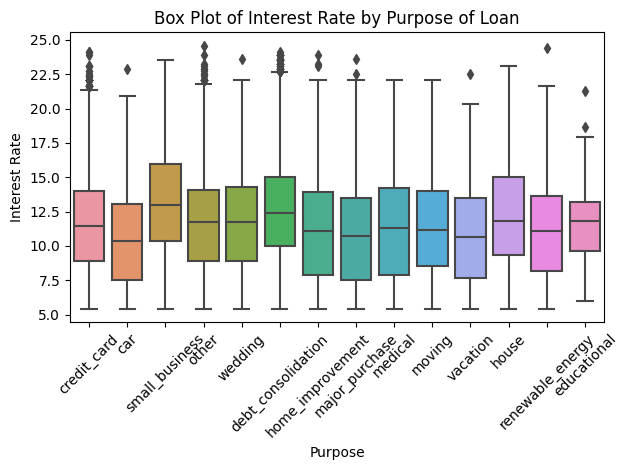

In [50]:
# 6. Ploting Pupose vs Interest rate
sns.boxplot(x=df['purpose'], y=df['int_rate'])
plt.xlabel('Purpose')
plt.ylabel('Interest Rate')
plt.title('Box Plot of Interest Rate by Purpose of Loan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion from the chart: 
1. The interest rate for "small business" loans tends to be higher, indicating that they might be perceived as riskier by lenders.
2. "Credit card" and "car" loans show lower median interest rates compared to other loan purposes.
3. The spread of interest rates for "debt consolidation", "home improvement", and "major purchase" is relatively narrow, suggesting consistent lending rates for these purposes.
4. "Renewable energy" and "educational" loans have slightly higher median interest rates compared to other categories but not as high as "small business".
5. Outliers are present in nearly every loan purpose, showing instances where unusually high or low-interest rates were given.

Impact on business:
1. Lenders might need to reconsider their risk assessment for "small business" loans, given the higher interest rates, to ensure they aren't discouraging potential borrowers.
2. The popularity of "credit card" and "car" loans might be attributed to their competitive interest rates, potentially driving more customers to these loan categories.
3. The consistency in interest rates for "debt consolidation" and related categories might indicate stable and predictable returns for businesses.
4. Businesses can promote "renewable energy" and "educational" loans more by possibly offering competitive rates, given the current societal emphasis on sustainability and education.
5. Monitoring the outliers and understanding the reasons behind such deviations can help businesses refine their lending strategies and policies.

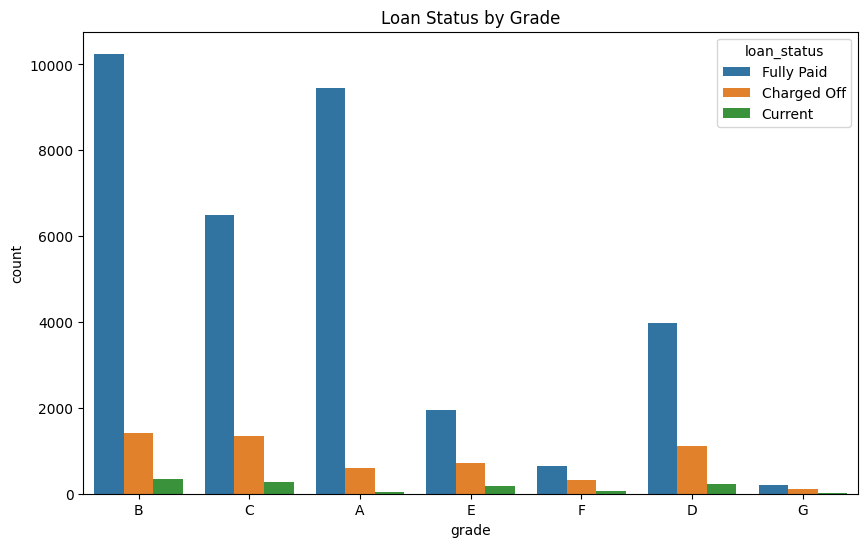

In [56]:
# 7. For the 'grade' column:
plt.figure(figsize=(10,6))
sns.countplot(x='grade', hue='loan_status', data=df)
plt.title('Loan Status by Grade')
plt.show()

Conclusion from the chart:
1. Most loans that fall under grades B and C are current, indicating a large number of active borrowers with these grades.
2. Grade A loans, typically considered the safest, have a significant number of fully paid statuses, with very few being charged off.
3. Grades E, F, and G have lower counts overall but have a noticeable proportion of charged off loans, indicating higher risk.
4. Grade D stands out with a fairly high number of loans charged off relative to its total.
5. There's an observable trend where the middle grades (B, C, D) have the highest loan counts, while the extremes (A, E, F, G) have fewer loans.

Impact on business:
1. Businesses may want to optimize their marketing and loan approval strategies towards grades B and C, given their high activity.
2. Maintaining or increasing the emphasis on Grade A loans can ensure a stable and safe return on investment due to their low default rate.
3. With Grades E, F, and G showing higher charge-offs, businesses might want to reconsider their risk assessment and interest rates for these grades.
4. The significant charge-offs in Grade D may prompt a review of the criteria for this grade and potentially re-evaluate the borrowers that fall into it.
5. Monitoring loan performance by grade can help businesses refine their credit policies and ensure sustainable growth while managing risks effectively.

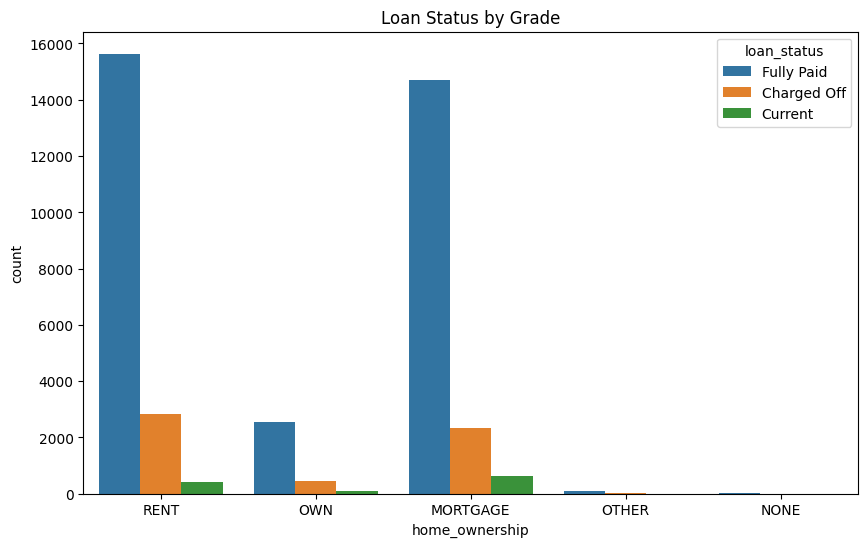

In [58]:
# 8. For the 'home_ownership' column:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title('Loan Status by Grade')
plt.show()

Conclusion from the chart:
1. The majority of loans are associated with borrowers who either rent or have a mortgage, with these two categories far surpassing other home ownership statuses in count.
2. Individuals with a mortgage have a high rate of current loans, indicating they are active borrowers and are managing their loans well.
3. Renters also predominantly have current loans, but they have a slightly more noticeable amount of charged-off loans than those with mortgages.
4. Borrowers who own their homes have fewer loans in general, and a more balanced distribution between fully paid and charged off.
5. The categories 'OTHER' and 'NONE' have very low counts, making them less significant in the overall analysis.

Impact on business:
1. Focusing on renters and individuals with mortgages can be profitable, as they form the bulk of the active loan market.
2. However, businesses should be slightly cautious with renters, given their comparatively higher charged-off rate than mortgage holders.
3. Offering specialized loan products or incentives to homeowners (those who own) might increase their participation and borrowing.
4. The 'OTHER' and 'NONE' categories might not be primary target segments due to their low representation, but understanding them better might reveal niche opportunities.
5. Continuous monitoring of loan performance across home ownership statuses can help businesses tailor their products and strategies to the most active and reliable market segments.

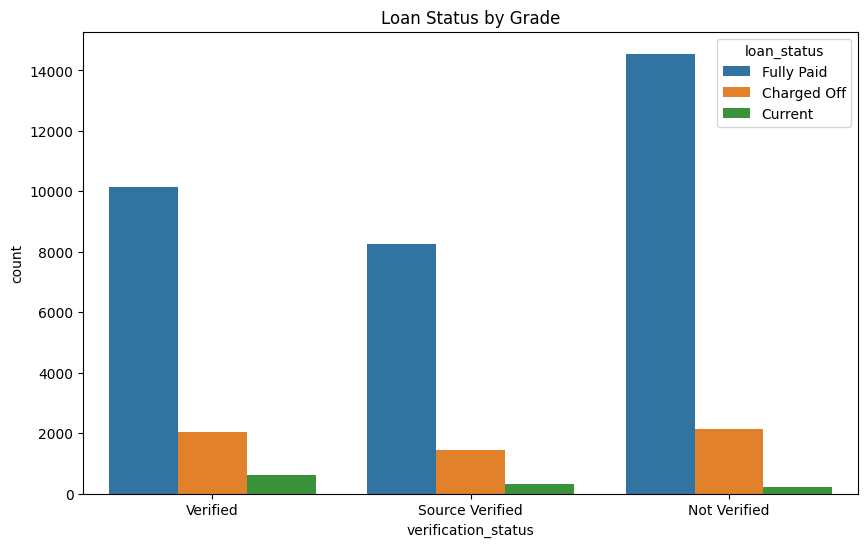

In [60]:
# 9. For the 'verification_status' column:
plt.figure(figsize=(10,6))
sns.countplot(x='verification_status', hue='loan_status', data=df)
plt.title('Loan Status by Grade')
plt.show()

Conclusion from the chart:
1. Loans with a 'Verified' status make up a significant portion, and within this category, most loans are current.
2. 'Not Verified' loans also have a high count, with the majority being current, but they also show a notable amount of charged-off loans.
3. 'Source Verified' loans have fewer counts compared to the other two, but exhibit a balanced distribution between fully paid and charged off loans, with a small number being current.
4. The rate of charged-off loans appears to be similar for both 'Verified' and 'Not Verified' categories.
5. Despite the verification status, a substantial number of loans across all categories are being managed well, as indicated by the 'Current' status.

Impact on business:
1. While 'Verified' loans seem reliable due to the high number of current loans, businesses should be mindful of the charged-off rates which appear similar to the 'Not Verified' category.
2. The 'Not Verified' category might require stricter scrutiny or additional measures to mitigate risks, given the significant count of charged-off loans.
3. Even though 'Source Verified' loans are fewer in number, they have a more balanced performance and could represent a segment where the verification process is more nuanced.
4. Continuous verification and monitoring can help in early detection of potential defaults, especially in the 'Not Verified' segment.
5. Tailoring loan products or incentives based on verification status can help businesses cater to different segments effectively while managing risks.

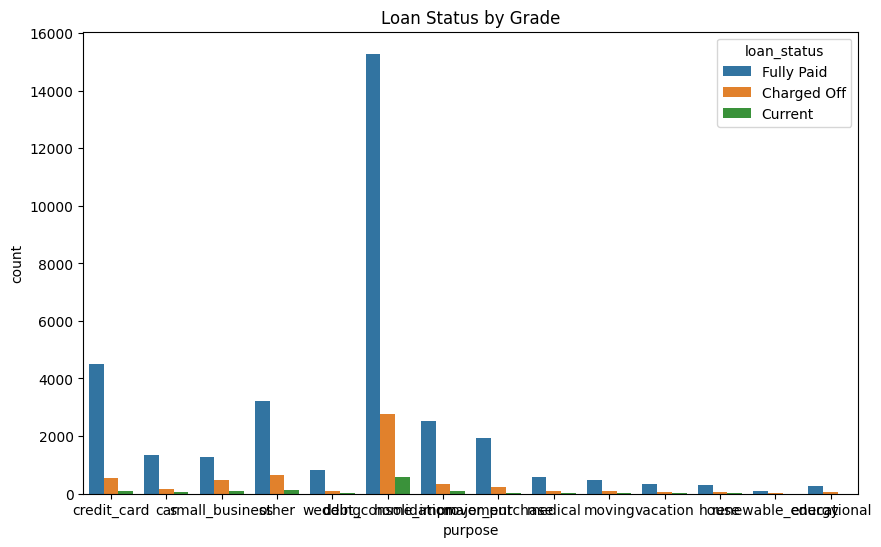

In [61]:
# 10. For the 'purpose' column:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('Loan Status by Grade')
plt.show()

Conclusion from the chart:
1. The most common purpose for loans, by a significant margin, is 'debt consolidation', with the majority being current.
2. 'Credit card', 'home improvement', and 'major purchase' also have a noticeable number of loans, with the majority in the 'Current' status.
3. The 'small_business' category, despite having fewer loans, shows a higher proportion of charged-off loans compared to other purposes.
4. Other loan purposes like 'wedding', 'medical', 'moving', 'vacation', 'renewable energy', and 'educational' have relatively lower counts, indicating they might not be as popular.
5. Across most loan purposes, the majority of loans are current, with only a few categories showing significant charged-off statuses.

Impact on business:
1. Given the popularity and performance of 'debt consolidation' loans, businesses could prioritize this segment for promotions or tailored offerings.
2. The 'small_business' category may require more stringent risk assessment and verification processes due to its higher charged-off rate.
3. Understanding the reasons behind the higher default rate in certain categories, like 'small_business', could help businesses develop better risk mitigation strategies.
4. By analyzing the less popular loan purposes, businesses can identify potential growth areas or consider additional incentives to increase uptake.
5. Maintaining the health of the majority 'current' loans across all categories should be a top priority, as it represents a significant portion of the portfolio's value.

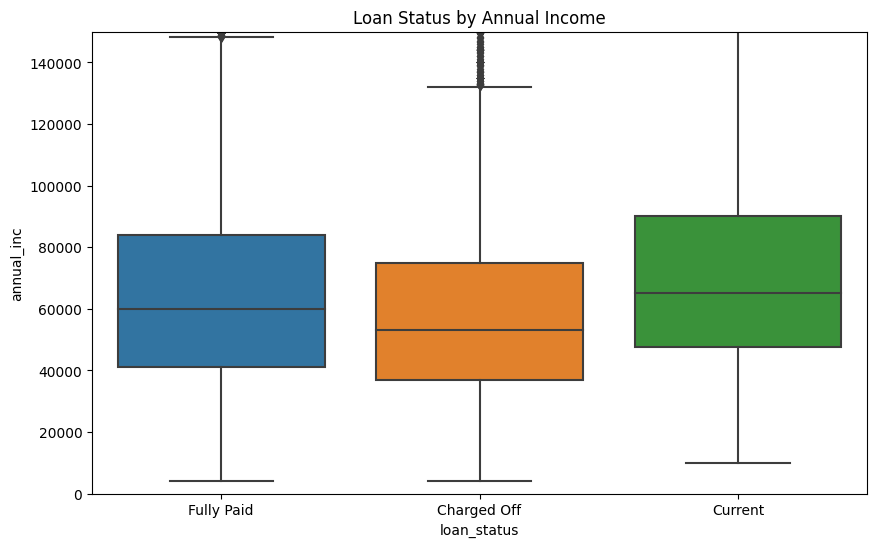

In [62]:
# 11. For the 'annual_inc' column:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('Loan Status by Annual Income')
plt.ylim(0, 150000) 
plt.show()


Conclusion from the chart:
1. The chart showcases the distribution of annual incomes for three different loan statuses: Fully Paid, Charged Off, and Current.
2. Borrowers who have fully paid off their loans generally fall within the mid-range of annual incomes, with very few outliers.
3. The charged-off category, representing defaulted loans, has a more spread-out income range with some significant outliers, particularly on the higher end.
4. The current loan status exhibits a compact annual income distribution, with a slightly higher median income compared to the fully paid category.
5. Across all loan statuses, most borrowers seem to have an annual income below $100,000, as indicated by the box sizes and their interquartile ranges.

Impact on business:
1. Recognizing that higher-income borrowers can still default on their loans, as seen in the outliers of the charged-off category, businesses might consider factors other than income when assessing loan risks.
2. The compact income distribution for current loans indicates a consistent target demographic, suggesting a potential preference or successful outreach to this group.
3. The broader spread of incomes in the charged-off category might require businesses to diversify their risk mitigation strategies.
4. By understanding that the majority of borrowers, irrespective of their loan status, have incomes below $100,000, businesses can tailor their products and services to this demographic.
5. The fewer outliers in the fully paid category compared to the charged-off category could prompt businesses to focus on improving payment structures or support for those on the fringes of the income distribution to reduce defaults.

/var/folders/cj/l36dpxtd61sfks85_gr27nx00000gn/T/ipykernel_42018/3123111806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


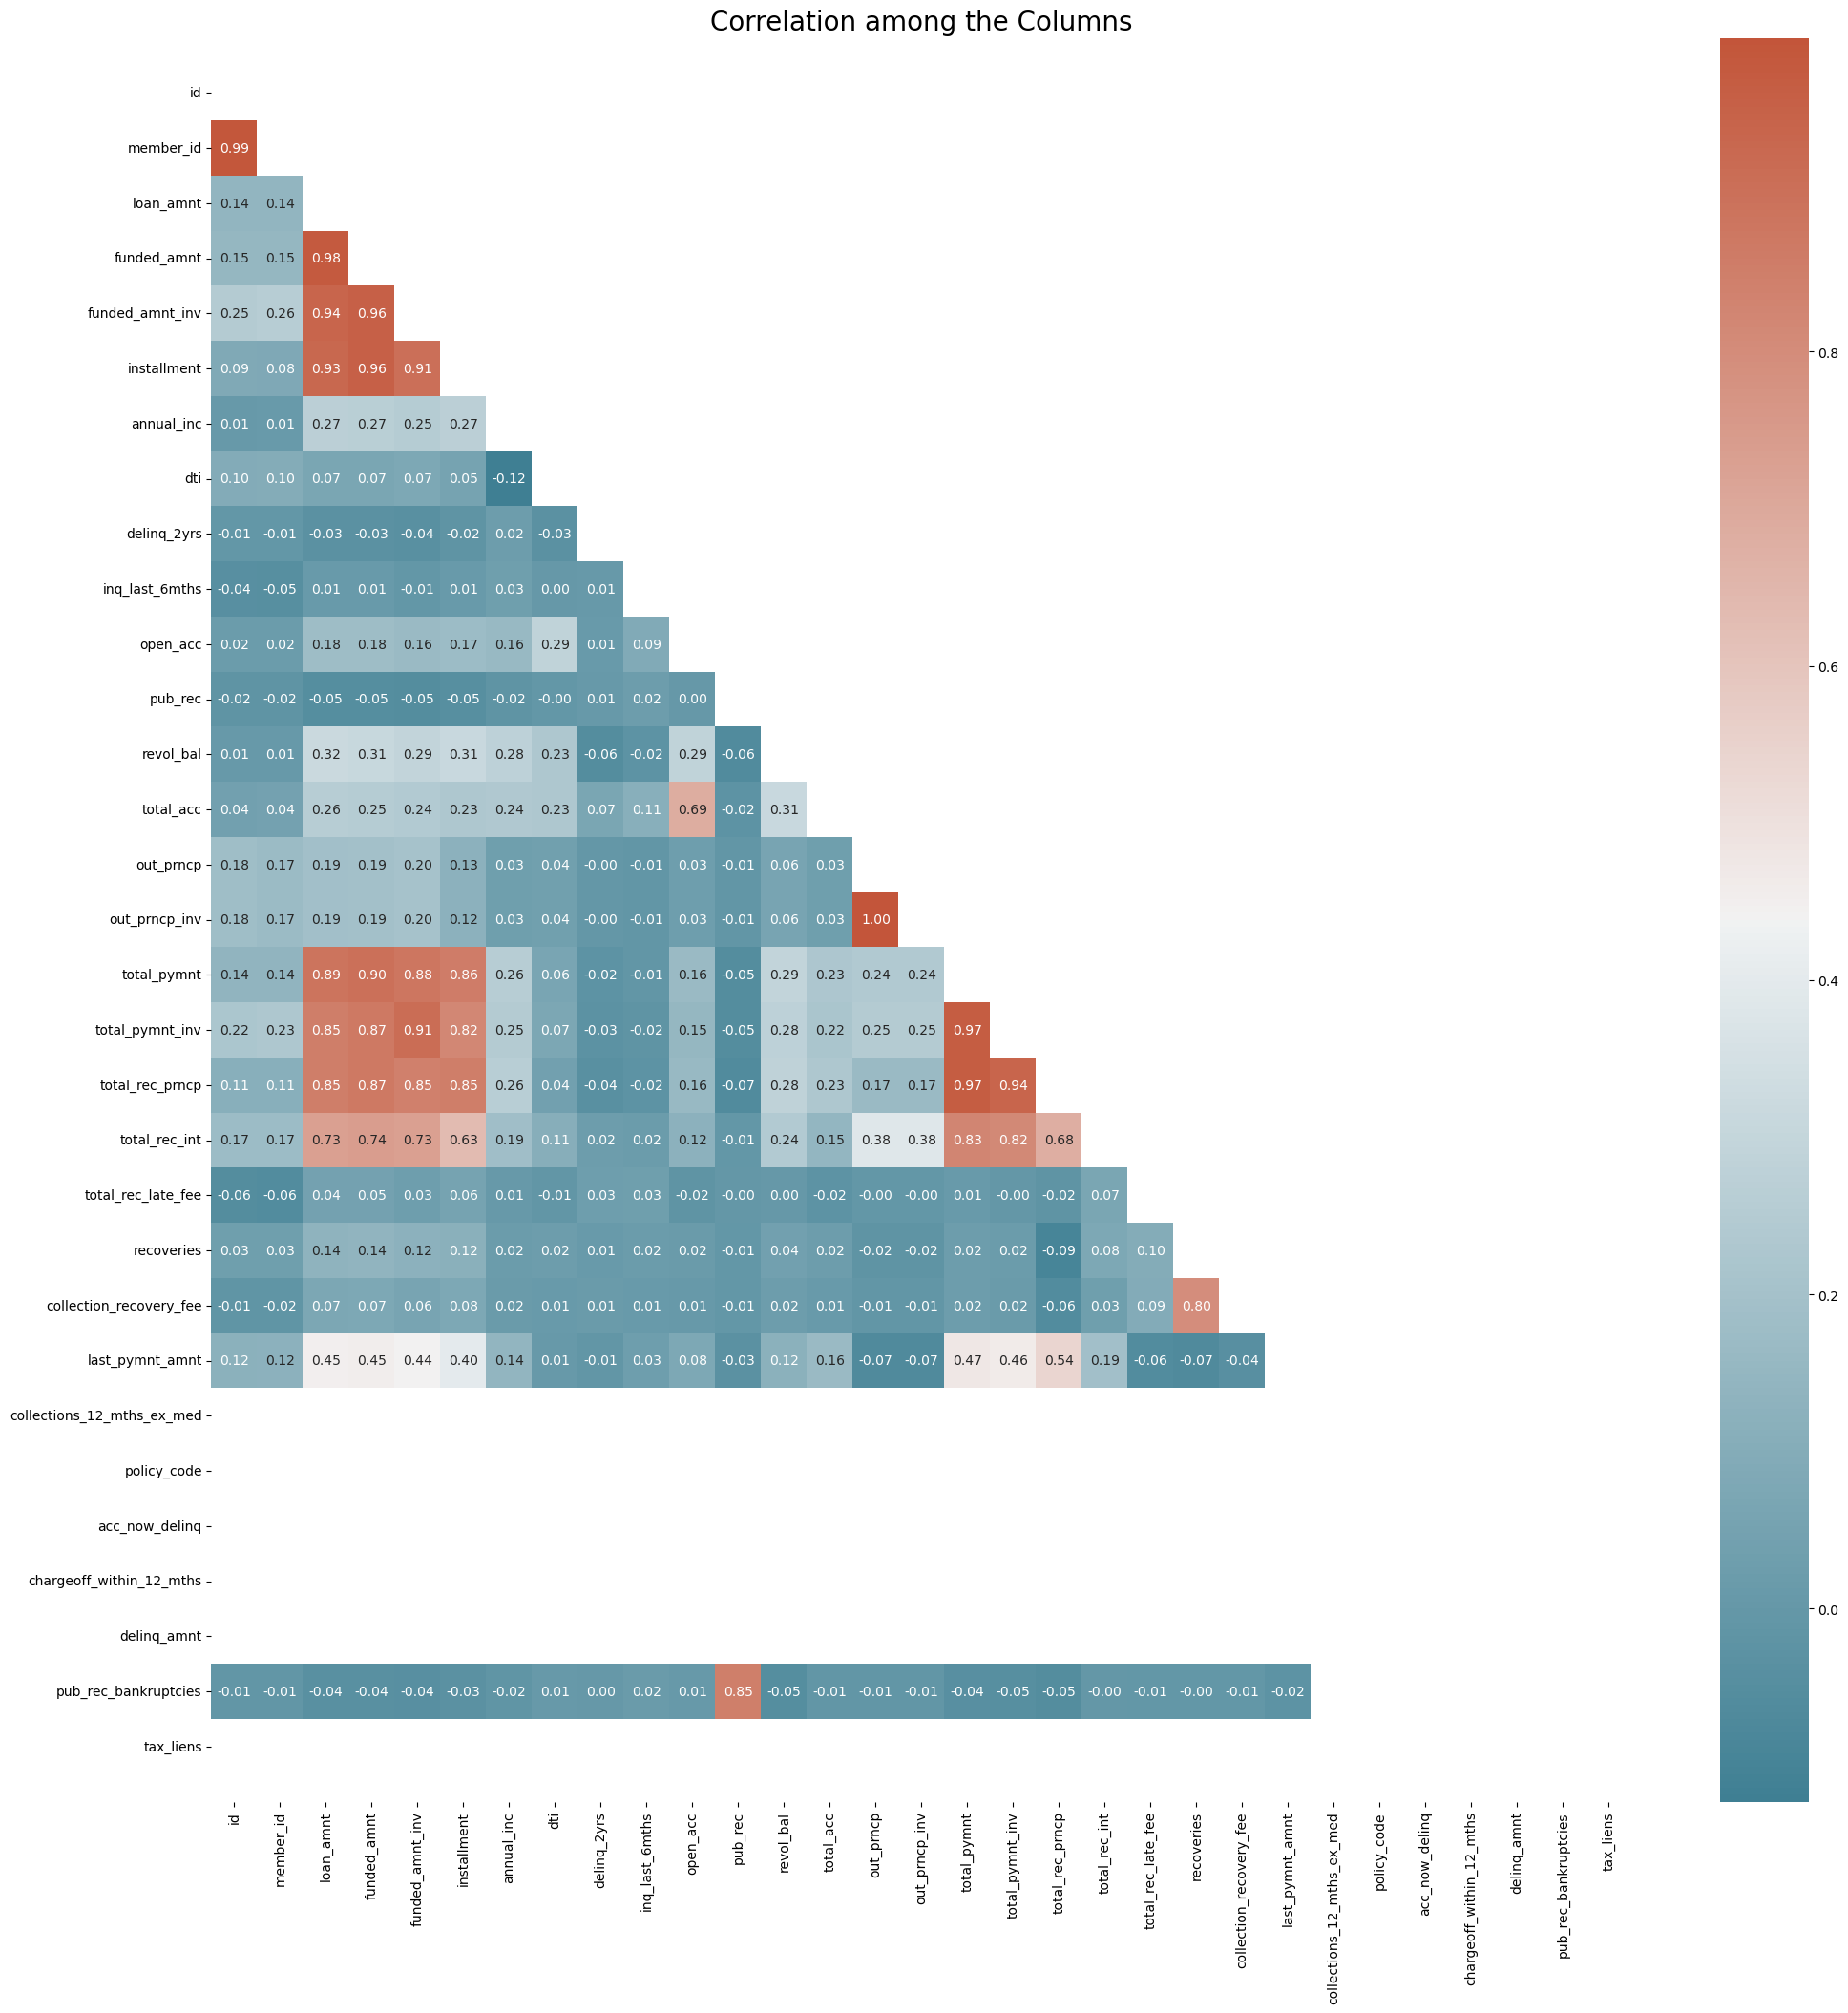

In [15]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(24, 24))

# Generateing a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Setting up the color palette with diverging colors
cmap = sns.diverging_palette(220, 20, as_cmap=True)
ax = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10})

# Fixing for cut-off top and bottom in recent versions of matplotlib
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

plt.title("Correlation among the Columns", fontsize=20)
plt.show()


Conclusions from the chart:

1. The chart showcases the correlation between various financial and credit attributes, with values ranging from -1 to 1, indicating negative and positive relationships respectively.
2. Attributes like 'loan_amnt', 'funded_amnt', and 'installment' exhibit high positive correlation, suggesting that the loan amount decided, the amount funded, and the installment amount are interrelated.
3. Conversely, there are some attributes with negligible correlation to others, implying that these features don't necessarily influence each other, such as the 'policy_code' which seems to have no significant correlation with other attributes.
4. Variables like 'total_rec_int' and 'total_pymnt' have moderate to high positive correlations, suggesting that as total payment increases, the interest received also goes up.
5. Features like 'pub_rec' and 'pub_rec_bankruptcies' have a positive correlation, hinting that borrowers with public records might have a higher likelihood of having public record bankruptcies.

Impact on Business:

1. Recognizing these correlations can assist businesses in developing predictive models, as variables with high correlations can be indicative of borrower behavior and repayment capabilities.
2. High correlation between loan amount, funded amount, and installment can mean standardized lending practices, but it may also signal a lack of flexibility in tailoring loan products to individual borrower needs.
3. For attributes with little to no correlation, businesses might need to reconsider the weightage of these features in decision-making processes as they might not add significant predictive power.
4. The positive correlation between public records and public record bankruptcies can help businesses in identifying potential high-risk borrowers, which can aid in risk assessment and loan approval decisions.
5. Utilizing these insights, lenders can refine their strategies, making them more robust and adaptive to the varying needs and risk profiles of borrowers.

 Analysis:

Significance of Loan Status with Respect to Different Parameters:
 Annual Income: 
1. Borrowers with higher annual incomes seem to have a higher rate of current loans and a higher chance of fully paying back their loans. 
2. Conversely, those with lower annual incomes seem to be at a higher risk of having their loans charged off.
Loan Purpose: 
1. The purpose of the loan seems to play a role in its status. 
2. Loans for credit card, small business, and debt consolidation purposes, for instance, have varying frequencies of being fully paid, charged off, or currently in payment.
3. Verification Status: The loan status also varies by the verification status. Notably, non-verified loans have a higher count, but it's essential to be cautious as non-verified might also carry higher risks.

 Loan Approval Considerations:
1. Income Level: Higher annual income groups tend to have a better repayment record. Thus, approving loans to these borrowers might be less risky.
2. Purpose of the Loan: Some purposes like debt consolidation and credit cards might be seen as riskier, given their higher default rates.
3. Verification Status: Verified loans or source-verified loans tend to be more trustworthy as their details have been cross-checked, making them potentially safer bets for loan approval.

 Risks:
1. Default Risk Based on Income: Lending to individuals with lower annual incomes might carry a higher risk of default.
2. Unverified Information: Loans that haven't undergone any verification might pose a higher risk due to the lack of a reliability check.
3. Loan Purpose: Some purposes, like debt consolidation or small businesses, might inherently carry more risk. It's essential to evaluate the default rates by loan purpose before approval.
4. Economic Fluctuations: Economic downturns can affect borrowers' ability to repay loans. Hence, it's crucial to consider the broader economic context.

 Significant Variables Indicating Default:
1. Annual Income: A lower annual income appears to be a red flag, as it correlates with a higher likelihood of loan charge-offs.
2. Loan Purpose: Certain loan purposes, such as debt consolidation or small businesses, show higher default tendencies.
3. Verification Status: Unverified loans might indicate a higher possibility of default due to a lack of due diligence.

In conclusion, while these charts provide valuable insights into the relationships between various variables and loan statuses, a more in-depth statistical analysis would provide a clearer picture of the exact risks and predictors of loan default. Always blend qualitative insights with quantitative findings to make holistic lending decisions.